# Data Processing for Neural Network Training

- Documentation of fit() function: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit
- Format of X (input data/sample) and y (output data/label) MUST MATCH: NumPy array, TF tensor, dict mapping input names to corresponding array/tensors etc.
- For this exercise we will put both in NumPy array format, and create our own data

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

### Create dummy data set of 2100 samples

Example data:
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
  # the ~5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)  # 1: experienced side effects

  # the ~5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)  # 0: did not experience side effects

for i in range(1000):
  # the ~95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # the ~95% of older individuals who did experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
for i in train_samples[:10]:
  print(i)

33
65
41
92
55
96
50
74
32
76


In [5]:
for i in train_labels[:10]:
  print(i)

1
0
1
0
1
0
1
0
1
0


### Transform list to NumPy array + Shuffle samples

Transform train_labels list to NumPy array, then shuffle samples to get rid of any imposed order from data generation process

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

### Normalize/standardize data

Make training of neural networks more efficient

In [7]:
# create feature range ranging from 0-1
scaler = MinMaxScaler(feature_range=(0,1))
# re-scale data from current scale of 13-100 to scale of 0-1
# re-shape 1D data to be able to pass it through fit_transform function
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples[:10]:
  print(i)

[0.17241379]
[0.28735632]
[0.73563218]
[0.85057471]
[0.65517241]
[0.59770115]
[0.16091954]
[0.09195402]
[0.77011494]
[0.5862069]


# Create an Artificial Neural Network

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam  # Adam and categorical_crossentropy will be used when we train the model, not when we build it
from tensorflow.keras.metrics import categorical_crossentropy

First hidden layer: 
- Dense layer - fully connected layer (most well-known type of layer in NN)
- input_shape - lets model understand shape of input data it should expect (*only specified for first hidden layer)
- units - no. of nodes/neurons (16 is arbitrary no.)

Output layer:
- 2 units correspond to two possible output classes
  - Patient did experience side effects
  - Patient did not experience side effects
- activation='softmax' - give probabilities for each output class

### Build Sequential model

Sequential model - a linear stack of layers

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),  # First hidden layer
    Dense(units=32, activation='relu'),  # Second hidden layer
    Dense(units=2, activation='softmax'),  # Output layer
])

### Print visual summary of architecture of the model we just created

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Train an Artificial Neural Network

### Prepare model for training

- metrics - what we use to judge model performance

In [12]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train model

- batch_size - how many samples included in one batch to be passed and processed by network at one time
- epochs - model train on samples 30 times before completing total training process
- shuffle - shuffle=True by default, erase order inside dataset before passing data to model
- verbose - option allowing us to see output when we run fit function, set to 0, 1 or 2 (2 is highest level of output)

In [13]:
# model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

# Build a Validation Set

Validation set:
- Measure how well model is generalizing on data it has never seen before
- Created before training begins: take subset of training set and separate into another set labelled as validation data
- Model will train on training data and validate on separated validation data

2 methods of creating validation set:
1. When we call model.fit(), pass in both training set and validation set

In [14]:
# model.fit(
#   x=scaled_train_samples,
#   y=train_labels,
#   validation_data=valid_set,
#   batch_size=10,
#   epochs=30,
#   verbose=2
#)

2. When we call model.fit(), use 'validation_split=0.1' (*Preferred method to save a step!)
  - Split occurs before set is shuffled => may yield some strange results => should shuffle data before passing it to fit function

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.7095 - accuracy: 0.4958 - val_loss: 0.7011 - val_accuracy: 0.4667
Epoch 2/30
189/189 - 0s - loss: 0.6898 - accuracy: 0.5794 - val_loss: 0.6799 - val_accuracy: 0.9000
Epoch 3/30
189/189 - 0s - loss: 0.6651 - accuracy: 0.9317 - val_loss: 0.6567 - val_accuracy: 0.9048
Epoch 4/30
189/189 - 0s - loss: 0.6422 - accuracy: 0.8995 - val_loss: 0.6346 - val_accuracy: 0.8952
Epoch 5/30
189/189 - 0s - loss: 0.6183 - accuracy: 0.8836 - val_loss: 0.6113 - val_accuracy: 0.8762
Epoch 6/30
189/189 - 0s - loss: 0.5933 - accuracy: 0.8677 - val_loss: 0.5867 - val_accuracy: 0.8762
Epoch 7/30
189/189 - 0s - loss: 0.5673 - accuracy: 0.8799 - val_loss: 0.5625 - val_accuracy: 0.8571
Epoch 8/30
189/189 - 0s - loss: 0.5412 - accuracy: 0.8693 - val_loss: 0.5385 - val_accuracy: 0.8810
Epoch 9/30
189/189 - 0s - loss: 0.5148 - accuracy: 0.8783 - val_loss: 0.5141 - val_accuracy: 0.8810
Epoch 10/30
189/189 - 0s - loss: 0.4888 - accuracy: 0.8783 - val_loss: 0.4908 - val_accuracy: 0.8810

Training and validation set:
- Accuracy and val_accuracy are pretty similar with only 2-3% difference
- Loss and val_loss are similar

=> Model is NOT overfitting, it is performing well

(*If val_accuracy is seriously lagging behind accuracy, then we know we have an overfitting problem)

# Neural Network Predictions

### Create Test Set

(*Same exact process as "Data Processing for Neural Network Training")



Test set:
- Hold out a subset of training data to be placed in a separate test set
- After the model has been trained and validated, take model and use it for inference purposes against test set
  - Inference - model takes what it learned during training, then uses that knowledge to infer things about data it hasn't seen before
  - Inference occurs once the model has been deployed to production => we are not able to make sense of how well the model did because we don't necessarily have correct labels for the data

In [17]:
test_labels = []
test_samples = []

In [18]:
for i in range(10):
  # the ~5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # the ~5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # the ~95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # the ~95% of older individuals who did experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Predict

- verbose=0 - no output because during predicting there is not any output that is going to be of use

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

First sample of test set:
- Model assigns 47% probability to this patient not experiencing a side effect
- 53% probability to this patient experiencing a side effect

Recall:
- '0' label - Not experience side effect
- '1' label - Experience side effect

In [20]:
for i in predictions[:10]:
  print(i)

[0.47354662 0.5264534 ]
[0.92091215 0.07908788]
[0.9356844  0.06431562]
[0.84230196 0.15769811]
[0.96509135 0.03490864]
[0.14480443 0.8551955 ]
[0.47354662 0.5264534 ]
[0.9643328  0.03566717]
[0.06194173 0.9380583 ]
[0.8269438  0.17305617]


If we are interested in seeing only the most probable prediction for each sample:

In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [22]:
for i in rounded_predictions[:10]:
  print(i)

1
0
0
0
0
1
1
0
1
0


# Create a Confusion Matrix for Neural Network Predictions

Visualize prediction results from a neural network during inference

### Create Confusion Matrix with Scikit-Learn

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

- y_true - pass in test_labels as true labels
- y_pred - pass in rounded_predictions as predictions

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

### Plot Confusion Matrix

[[185  25]
 [ 10 200]]


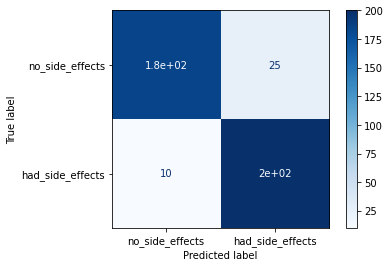

In [25]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp = disp.plot(cmap=plt.cm.Blues)
print(cm)
plt.show()

How to read confusion matrix:
- 10 patients had no side effects 10 times when the patient actually had a side effect
- 200 patients had no side effects 200 times and the patient had no side effects
- 385 correct predictions out of total 420
- 92% accuracy rate on test set => Equivalent to what we were seeing on our training and validation set

# Save and Load a Model

## 1. model.save()

### Check to see if file exists already + Save Model to disk

In [26]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
 model.save('models/medical_trial_model.h5')

This save function saves:
- Architecture of the model, allowing us to re-create the model
- Weights of the model
- Training configuration (loss, optimizer)
- State of the optimizer, allowing us to resume training exactly where we left off

### Load Model

In [27]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

Exact replica of original model's architecture:

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()[:2]

[array([[-0.23161316,  0.29823261, -0.35276443, -0.42016113,  0.50237644,
          0.31489217,  0.3476417 , -0.5930295 ,  0.10733649,  0.7438787 ,
          0.5633383 , -0.16458303,  0.24780147,  0.40829405,  0.37480015,
          0.13979067]], dtype=float32),
 array([ 0.        , -0.10153672,  0.        ,  0.        , -0.1009612 ,
        -0.10992409, -0.1159008 ,  0.        ,  0.23399147, -0.10338299,
        -0.06988991,  0.        , -0.08829214, -0.12482579, -0.12352033,
        -0.05216355], dtype=float32)]

In [30]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights of training configuration, you can use the following function to save the architecture only

### Save as JSON

In [31]:
json_string = model.to_json()

In [32]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

### Save as YAML

In [33]:
# yaml_string = model.to_yaml()

### Model Reconstruction from JSON

In [34]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

- Architecture retained
- But have to retrain it to update weights, and compile it to get an optimizer and loss

In [35]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Model Reconstruction from YAML

In [36]:
# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yaml_string)

## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function

### Check to see if file exists already + Save Weights to disk

In [37]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
 model.save('models/my_model_weights.h5')

### Create new model with same architecture + Load in Weights

In [38]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),  # First hidden layer
    Dense(units=32, activation='relu'),  # Second hidden layer
    Dense(units=2, activation='softmax'),  # Output layer
])

In [39]:
model2.load_weights('models/my_model_weights.h5')

In [40]:
model2.get_weights()[:2]

[array([[-0.23161316,  0.29823261, -0.35276443, -0.42016113,  0.50237644,
          0.31489217,  0.3476417 , -0.5930295 ,  0.10733649,  0.7438787 ,
          0.5633383 , -0.16458303,  0.24780147,  0.40829405,  0.37480015,
          0.13979067]], dtype=float32),
 array([ 0.        , -0.10153672,  0.        ,  0.        , -0.1009612 ,
        -0.10992409, -0.1159008 ,  0.        ,  0.23399147, -0.10338299,
        -0.06988991,  0.        , -0.08829214, -0.12482579, -0.12352033,
        -0.05216355], dtype=float32)]